# Class Session 17 Exercise:
## Comparing the histograms of local clustering coefficients of date hubs and party hubs

load the file of hub types `shared/han_hub_data.txt` (two-column TSV file, first column is the protein name, and second column contains `date` or `party`)

In [1]:
hub_data <- read.table("shared/han_hub_data.txt", 
                       sep="\t",
                       header=TRUE,
                       stringsAsFactors=FALSE)

load the file of network edges `shared/han_network_edges.txt` (two-column file, with first column is the first protein in the interacting pair, and the second column is the second protein in the interacting pair)

In [3]:
edge_df <- read.table("shared/han_network_edges.txt",
                     sep="\t",
                     header=TRUE,
                     stringsAsFactors=FALSE)

make an undirected igraph `Graph` from the edgelist data; show summary data on the graph as a sanity-check

In [6]:
library(igraph)
ppi_graph <- graph_from_data_frame(edge_df, directed=FALSE)
summary(ppi_graph)

IGRAPH UN-- 1344 2523 -- 
+ attr: name (v/c)


get the igraph vertex indexes of the proteins that are date hubs or party hubs; as a sanity check, print out the number of date hubs and party hubs that you find

In [33]:
graph_hub_types <- hub_data$HubType[match(V(ppi_graph)$name, hub_data$Protein)]
date_hub_inds <- which(graph_hub_types=="date")
party_hub_inds <- which(graph_hub_types=="party")
print(sprintf("number of date hubs: %d", length(date_hub_inds)))
print(sprintf("number of party hubs: %d", length(party_hub_inds)))

[1] "number of date hubs: 91"
[1] "number of party hubs: 108"


use the `transitivity` function in igraph to compute the local clustering coefficients for every vertex in the graph; print out the first six components of the vector of data returned, as a sanity check

In [34]:
local_clust_coeffs <- transitivity(ppi_graph, type="local")
head(local_clust_coeffs)

[1]        NaN 0.66666667 0.05147059 0.68131868        NaN 0.00000000

Plot the histograms of the local clustering coefficients of the "date hubs" and the "party hubs".

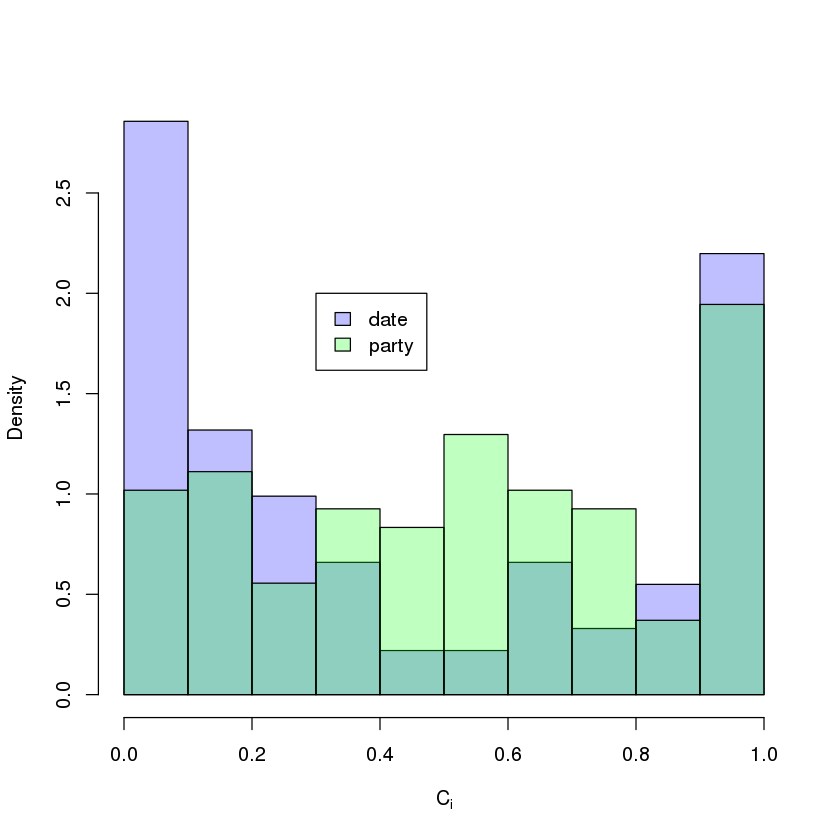

In [74]:
nbreaks <- 10
breaks <- (0:nbreaks)/nbreaks
hist_date <- hist(local_clust_coeffs[date_hub_inds], breaks=breaks, plot=FALSE)
hist_party <- hist(local_clust_coeffs[party_hub_inds], breaks=breaks, plot=FALSE)
plotvals <- 0.5*(breaks[1:nbreaks] + breaks[2:(nbreaks+1)])
plot(hist_date, col=rgb(0,0,1,1/4), xlab=expression(C[i]), main="", freq=FALSE)
plot(hist_party, col=rgb(0,1,0,1/4), add=TRUE, freq=FALSE)
legend(0.3, 2, legend=c("date","party"), fill=c(rgb(0,0,1,1/4),rgb(0,1,0,1/4)))

In [76]:
print(ks.test(local_clust_coeffs[date_hub_inds],local_clust_coeffs[party_hub_inds]))

Warning message in ks.test(local_clust_coeffs[date_hub_inds], local_clust_coeffs[party_hub_inds]):
"cannot compute exact p-value with ties"


	Two-sample Kolmogorov-Smirnov test

data:  local_clust_coeffs[date_hub_inds] and local_clust_coeffs[party_hub_inds]
D = 0.25895, p-value = 0.002658
alternative hypothesis: two-sided



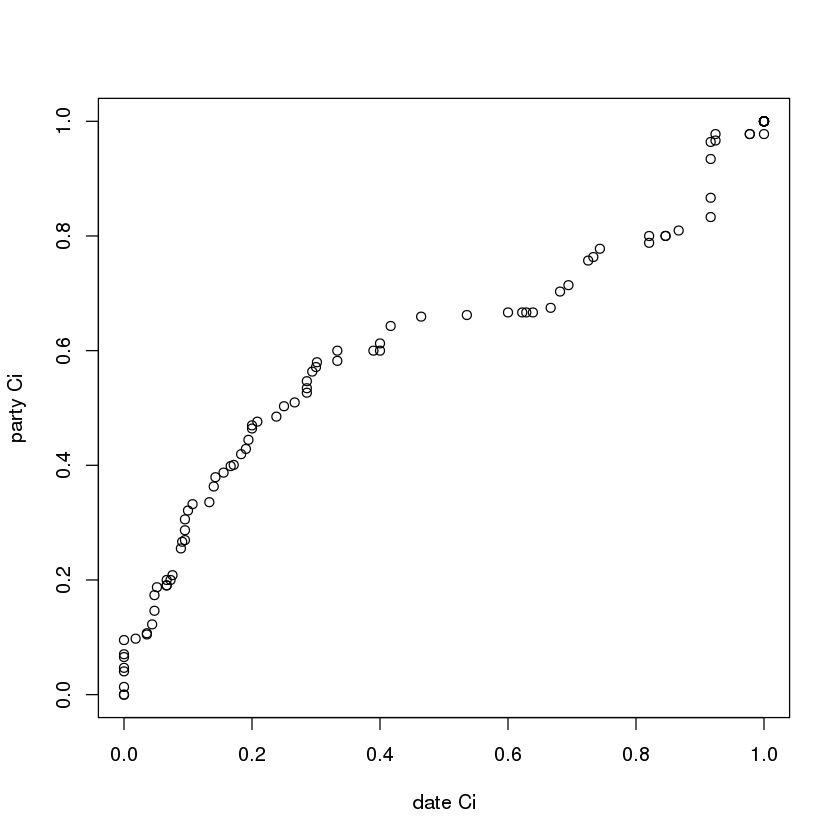

In [80]:
qqplot(local_clust_coeffs[date_hub_inds],local_clust_coeffs[party_hub_inds],xlab="date Ci",ylab="party Ci")